In [1]:
debug = 1
print('Importing packages...')
import os
import pandas
import time
import numpy as np
from matplotlib import pyplot as plt
import geopandas
from shapely.geometry import Point
from shapely.ops import cascaded_union
pandas.set_option('display.max_colwidth', -1)

#basedir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/datasets/acs5/'
#census_data_basedir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/datasets/acs5/'

thisdir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/'
datadir = thisdir + 'datasets_for_analysis/'
#census_data_dir = datadir + 'acs5/'
#census_acs5_rawdata_basedir = '/home/idies/workspace/Temporary/raddick/census_scratch/acs5/'

shapefile_basedir = '/home/idies/workspace/Storage/raddick/Baltimore/shapefiles/'
census_shapefile_tiger_basedir = '/home/idies/workspace/Temporary/raddick/census_scratch/shapefiles/'

#inflation_dir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/datasets/inflation/'

figdir = thisdir + 'figures/'
mapdir = thisdir + 'maps/'
#outdir = thisdir + 'datasets_for_analysis/'

for x in [datadir, figdir, mapdir]:
    if not(os.path.exists(x)):
        os.makedirs(x)

os.chdir(thisdir)
os.getcwd()

print('done')

Importing packages...
done


# Re-analyze by CSA

In [2]:
df = pandas.read_csv(datadir+'reinvestment_by_census_tract_for_smallest_businesses.csv', encoding='utf-8')#, index_col=['census_tract', 'activity_year'])
print('backing up...')
df_bk = df

cra_loan_columns = ['census_tract']#, 'activity_year']
cra_loan_columns += ['nLoans1', 'nLoans100k', 'nLoans250k', 'nLoansToSmallest', 'nLoansTotal', 'nWorkingLoans']
cra_loan_columns += ['amtLoans1_adj', 'amtLoans100k_adj', 'amtLoans250k_adj', 'amtLoansToSmallest_adj']
cra_loan_columns += ['amtLoansTotal_adj', 'amtWorkingLoans_adj']

cra_tract_columns = ['census_tract', 'activity_year']
cra_tract_columns += ['GEOID', 'income_group_code', 'income_group', 'cra_level']

census_columns = ['census_tract', 'activity_year']
census_columns += ['pop_total', 'total_householders', 'pop_white', 'pop_black']
census_columns += ['black_householder', 'white_householder', 'owner_occ_housing_units', 'mfi_adj']
census_columns += ['female_householder', 'unemployed_16plus', 'poverty_past_12_months']
census_columns += ['median_home_value', 'median_year_built']
census_columns += ['labor_force_16plus', 'poverty_status_known_last12months_total']
census_columns += ['hs_grad_25plus', 'pop_25plus']

census_columns += ['pop_total_err','total_householders_err', 'pop_white_err', 'pop_black_err']
census_columns += ['black_householder_err', 'white_householder_err', 'owner_occ_housing_units_err']
census_columns += ['mfi_err', 'female_householder_err', 'unemployed_16plus_err']
census_columns += ['poverty_past_12_months_err', 'median_home_value_err', 'median_year_built_err']
census_columns += ['labor_force_16plus_err', 'poverty_status_known_last12months_total_err']
census_columns += ['hs_grad_25plus_serr', 'pop_25plus_serr']

jobs_columns = ['census_tract', 'activity_year']
jobs_columns += ['Total number of jobs', 'Number of jobs for workers age 29 or younger']
jobs_columns += ['Number of jobs for workers age 30 to 54', 'Number of jobs for workers age 55 or older']
jobs_columns += ['Number of jobs with earnings $1250/month or less']
jobs_columns += ['Number of jobs with earnings $1251/month to $3333/month']
jobs_columns += ['Number of jobs with earnings greater than $3333/month']
jobs_columns += ['Number of jobs in NAICS sector 11 (Agriculture, Forestry, Fishing and Hunting)']
jobs_columns += ['Number of jobs in NAICS sector 21 (Mining, Quarrying, and Oil and Gas Extraction)']
jobs_columns += ['Number of jobs in NAICS sector 22 (Utilities)']
jobs_columns += ['Number of jobs in NAICS sector 23 (Construction)']
jobs_columns += ['Number of jobs in NAICS sector 31-33 (Manufacturing)']
jobs_columns += ['Number of jobs in NAICS sector 42 (Wholesale Trade)']
jobs_columns += ['Number of jobs in NAICS sector 44-45 (Retail Trade)']
jobs_columns += ['Number of jobs in NAICS sector 48-49 (Transportation and Warehousing)']
jobs_columns += ['Number of jobs in NAICS sector 51 (Information)']
jobs_columns += ['Number of jobs in NAICS sector 52 (Finance and Insurance)']
jobs_columns += ['Number of jobs in NAICS sector 53 (Real Estate and Rental and Leasing)']
jobs_columns += ['Number of jobs in NAICS sector 54 (Professional, Scientific, and Technical Services)']
jobs_columns += ['Number of jobs in NAICS sector 55 (Management of Companies and Enterprises)']
jobs_columns += ['Number of jobs in NAICS sector 56 (Administrative and Support and Waste Management and Remediation Services)']
jobs_columns += ['Number of jobs in NAICS sector 61 (Educational Services)']
jobs_columns += ['Number of jobs in NAICS sector 62 (Health Care and Social Assistance)']
jobs_columns += ['Number of jobs in NAICS sector 71 (Arts, Entertainment, and Recreation)']
jobs_columns += ['Number of jobs in NAICS sector 72 (Accommodation and Food Services)']
jobs_columns += ['Number of jobs in NAICS sector 81 (Other Services [except Public Administration])']
jobs_columns += ['Number of jobs in NAICS sector 92 (Public Administration)']
jobs_columns += ['Number of jobs for workers with Race: White, Alone']
jobs_columns += ['Number of jobs for workers with Race: Black or African American Alone']
jobs_columns += ['Number of jobs for workers with Race: American Indian or Alaska Native Alone']
jobs_columns += ['Number of jobs for workers with Race: Asian Alone']
jobs_columns += ['Number of jobs for workers with Race: Native Hawaiian or Other Pacific Islander Alone']
jobs_columns += ['Number of jobs for workers with Race: Two or More Race Groups']
jobs_columns += ['Number of jobs for workers with Ethnicity: Not Hispanic or Latino']
jobs_columns += ['Number of jobs for workers with Ethnicity: Hispanic or Latino']
jobs_columns += ['Number of jobs for workers with Educational Attainment: Less than high school']
jobs_columns += ['Number of jobs for workers with Educational Attainment: High school or equivalent, no college']
jobs_columns += ['Number of jobs for workers with Educational Attainment: Some college or Associate degree']
jobs_columns += ["Number of jobs for workers with Educational Attainment: Bachelor's degree or advanced degree"]
jobs_columns += ['Number of jobs for workers with Sex: Male']
jobs_columns += ['Number of jobs for workers with Sex: Female']
jobs_columns += ['Number of jobs for workers at firms with Firm Age: 0-1 Years']
jobs_columns += ['Number of jobs for workers at firms with Firm Age: 2-3 Years']
jobs_columns += ['Number of jobs for workers at firms with Firm Age: 4-5 Years']
jobs_columns += ['Number of jobs for workers at firms with Firm Age: 6-10 Years']
jobs_columns += ['Number of jobs for workers at firms with Firm Age: 11+ Years']
jobs_columns += ['Number of jobs for workers at firms with Firm Size: 0-19 Employees']
jobs_columns += ['Number of jobs for workers at firms with Firm Size: 20-49 Employees']
jobs_columns += ['Number of jobs for workers at firms with Firm Size: 50-249 Employees']
jobs_columns += ['Number of jobs for workers at firms with Firm Size: 250-499 Employees']
jobs_columns += ['Number of jobs for workers at firms with Firm Size: 500+ Employees']
print('ok')

#df[cra_loan_columns]
all_loans_df = df[cra_loan_columns].groupby('census_tract').sum()

print('backing up...')
all_loans_df_bk = all_loans_df

print('Done')

backing up...
ok
backing up...
Done


## Get loan numbers and amounts by CSA

In [3]:
print('getting from backup...')
all_loans_df = all_loans_df_bk

csa_df = pandas.read_csv(thisdir+'census_tract_to_neighborhood.csv', index_col='NAME10', encoding='utf-8', low_memory=False)
csa_df.index.name = 'census_tract'
all_loans_df = all_loans_df.join(csa_df)

if ('CSA2010' not in cra_loan_columns):
    cra_loan_columns.append('CSA2010')

loans_by_csa_df = pandas.DataFrame(all_loans_df.groupby('CSA2010').size(), columns=['nTracts'])
loans_by_csa_df = loans_by_csa_df.join(all_loans_df.reset_index()[cra_loan_columns].groupby('CSA2010').sum())

print('backing up...')
loans_by_csa_df_bk = loans_by_csa_df

print('done')
#loans_by_csa_df

getting from backup...
backing up...
done


## Join jobs data by CSA

In [4]:
print('getting from backup...')
loans_by_csa_df = loans_by_csa_df_bk

jobs_2015_df = df[jobs_columns][df['activity_year'] == 2015].set_index('census_tract')
jobs_2015_df = jobs_2015_df.drop('activity_year', axis=1)
jobs_2015_df = jobs_2015_df.join(csa_df['CSA2010'])

jobs_2015_by_csa_df = pandas.DataFrame(jobs_2015_df.groupby('CSA2010')['Number of jobs for workers at firms with Firm Size: 0-19 Employees'].sum())
loans_by_csa_df = loans_by_csa_df.join(jobs_2015_by_csa_df[jobs_2015_by_csa_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] > 0])
loans_by_csa_df = loans_by_csa_df.assign(nWorkingLoans_per_sbjob2015 = loans_by_csa_df['nWorkingLoans'] / loans_by_csa_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
loans_by_csa_df = loans_by_csa_df.assign(amtWorkingLoans_per_sbjob2015_adj = loans_by_csa_df['amtWorkingLoans_adj'] / loans_by_csa_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])

print('backing up...')
loans_by_csa_df_bk = loans_by_csa_df
print('Done')


getting from backup...
backing up...
Done


## Get tract shapefiles

In [5]:
thisyear = 2017

if (debug > 0):
    print('joining shapefiles for {0:.0f}...'.format(thisyear))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_24_tract.shp'.format(thisyear))
tract_shapes_gdf = tract_shapes_gdf[tract_shapes_gdf['COUNTYFP'] == '510']
tract_shapes_gdf.loc[:, 'NAME'] = pandas.to_numeric(tract_shapes_gdf['NAME'], errors='coerce')
tract_shapes_gdf = tract_shapes_gdf.assign(census_tract = pandas.to_numeric(tract_shapes_gdf['GEOID'].apply(lambda x: x[5:9]+'.'+x[9:]), errors='coerce'))
tract_shapes_gdf = tract_shapes_gdf.set_index('census_tract')

tract_shapes_gdf = tract_shapes_gdf.join(csa_df['CSA2010'], how='left')

print('backing shapefile data...')
tract_shapes_gdf_bk = tract_shapes_gdf

print('Done!')
#tract_shapes_gdf


joining shapefiles for 2017...
backing shapefile data...
Done!


## Combine tract shapefiles into CSAs (cascaded union)

In [12]:
csa_shapes_df = pandas.DataFrame(tract_shapes_gdf['CSA2010'].drop_duplicates().sort_values(), columns=['CSA2010', 'geometry'])
csa_shapes_df = csa_shapes_df.set_index('CSA2010')
for this_csa in csa_shapes_df.index:
    x = tract_shapes_gdf['geometry'][tract_shapes_gdf['CSA2010'] == this_csa].tolist()
    y = cascaded_union(x)
    csa_shapes_df.loc[this_csa, 'geometry'] = y

csa_shapes_gdf = geopandas.GeoDataFrame(csa_shapes_df, crs=tract_shapes_gdf.crs)

print('backing up CSA shapefiles...')
csa_shapes_gdf_bk = csa_shapes_gdf

print('done')

backing up CSA shapefiles...
done


### Cut out the harbor

getting from backup...
backing up...


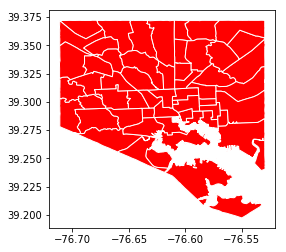

In [16]:
print('getting from backup...')
csa_shapes_gdf = csa_shapes_gdf_bk

fig, ax = plt.subplots(1,1)

#tract_shapes_gdf.plot(color='darkgreen', edgecolor='white', ax=ax)

water_gdf = geopandas.read_file(shapefile_basedir+'water/water.shp')
water_gdf = water_gdf.to_crs(csa_shapes_gdf.crs)

csa_shapes_gdf = geopandas.overlay(csa_shapes_gdf, water_gdf[water_gdf['NAME'] == 'Harbor'], how='difference')

csa_shapes_gdf.plot(ax=ax, color='red', edgecolor='white')

print('backing up...')
csa_shapes_gdf_bk = csa_shapes_gdf

plt.show()


## Join CSA shapefiles onto loan and job data

In [17]:
print('getting both from backup...')
loans_by_csa_df = loans_by_csa_df_bk
csa_shapes_gdf = csa_shapes_gdf_bk

loans_by_csa_df = loans_by_csa_df.join(csa_shapes_gdf)
loans_by_csa_gdf = geopandas.GeoDataFrame(loans_by_csa_df, crs=csa_shapes_gdf.crs)

print('backing up...')
loans_by_csa_gdf_bk = loans_by_csa_gdf
print('done')


getting both from backup...
backing up...
done


## Read some other datasets useful for mapping

In [18]:
print('Reading city boundary...')
outline_filename = shapefile_basedir + 'baltimore_city_polygon/baltimore_city_polygon.shp'
city_outline_gdf = geopandas.read_file(outline_filename)
city_outline_gdf = city_outline_gdf.to_crs(tract_shapes_gdf.crs)

#print('Reading water features...')
#water_filename = shapefile_basedir + 'water/water.shp'
#water_gdf = geopandas.read_file(water_filename)
#water_gdf = water_gdf.set_index('OBJECTID')
#water_gdf = water_gdf.to_crs(tract_shapes_gdf.crs)


#print('Finding location of JHU...')
#businesses = []
#biz1dict = {'name': 'Johns Hopkins University', 'address': '3400 N. Charles St. Baltimore, MD'}
##businesses.append(biz1dict)
##biz2dict = {'name': 'Refereshing Life Ministries', 'address': '2603 Baker St. Baltimore, MD'}
##businesses.append(biz2dict)
#g = geocoder.bing(biz1dict['address'], key='Agrc_VFxa6iK3mVYNIC1Mcao2TwVTPG5tDbok7UbDcCYf5PRGmnaeLF_Wm_znHeo')
#thegeometry = Point(g.latlng)
#g_df = pandas.DataFrame(data=g.latlng)
#g_df = g_df.T
#g_df = g_df.rename(columns={0: 'lat', 1: 'long'})
#g_df = g_df.assign(geometry=Point(g_df['long'], g_df['lat']))
#g_gdf = geopandas.GeoDataFrame(data=g_df, geometry='geometry')
#g_gdf.crs = {'init': 'epsg:4326'}
#g_gdf = g_gdf.to_crs(tract_shapes_gdf.crs)

print('Reading streets...')
s = time.time()
streets_filename = shapefile_basedir + 'streets/streetcl.shp'
streets_gdf = geopandas.read_file(streets_filename)
streets_gdf = streets_gdf.set_index('OBJECTID')
streets_gdf = streets_gdf.to_crs(tract_shapes_gdf.crs)
e = time.time()
print('Read {0:,.0f} street centerlines in {1:,.1f} seconds.'.format(len(streets_gdf), e-s))

print('Done!')
#g_gdf


Reading city boundary...
Reading streets...
Read 48,160 street centerlines in 22.0 seconds.
Done!


# PLOT!

getting from backup...
Figure saved!


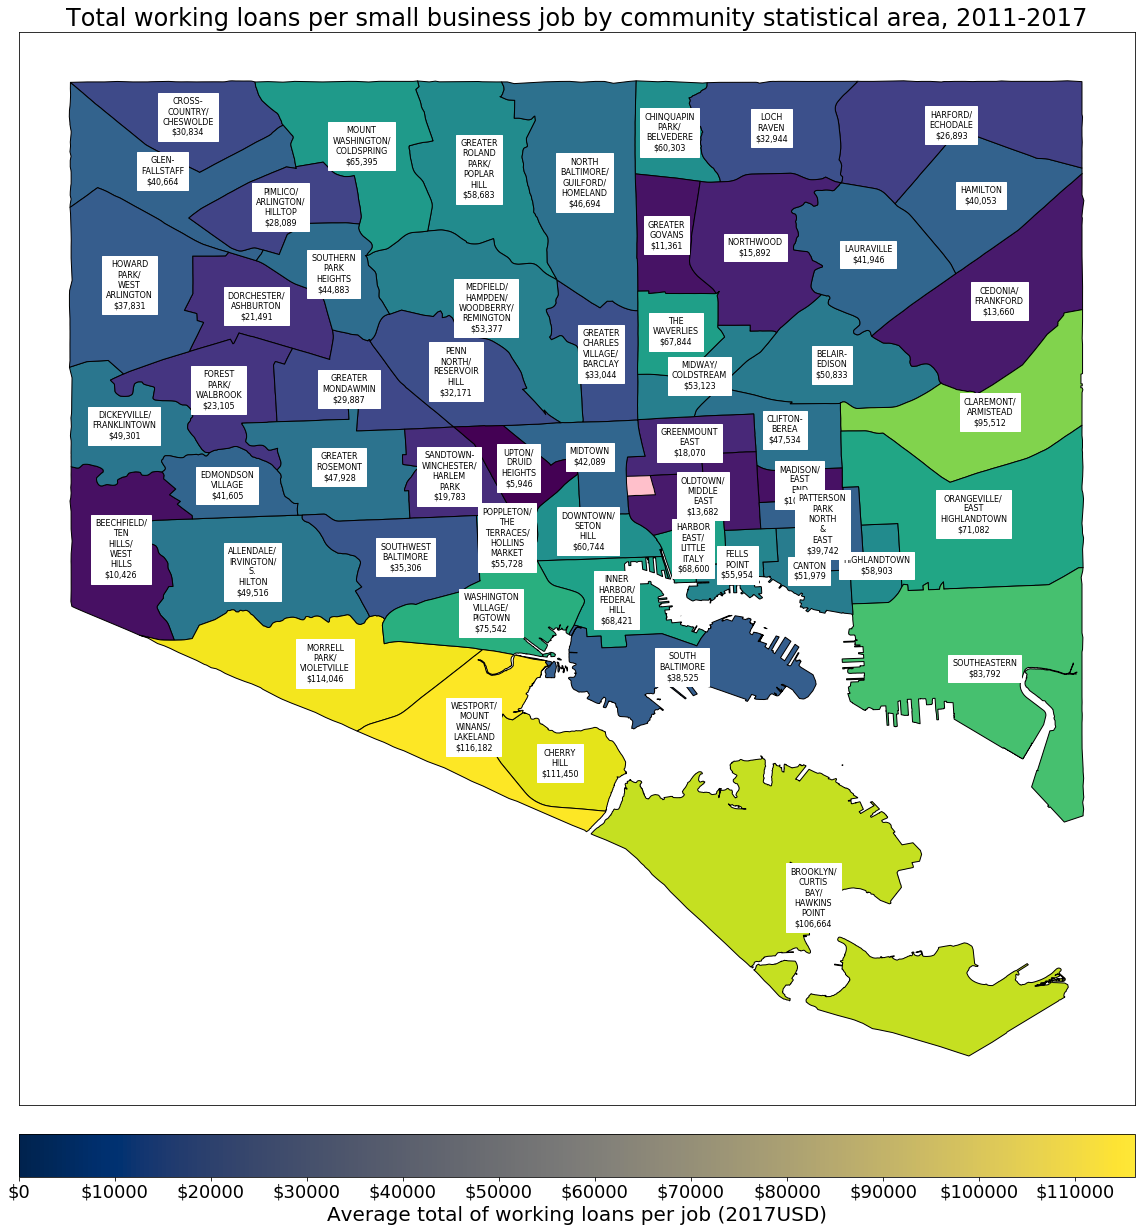

In [34]:
print('getting from backup...')
loans_by_csa_gdf = loans_by_csa_gdf_bk

scale = 1

fig, ax = plt.subplots(1,1, figsize=(20*scale,20*scale))

plt.title('Total working loans per small business job by community statistical area, 2011-2017', fontsize=24*scale)

loans_by_csa_gdf.plot(ax=ax, color='pink') # show nans as pink

loans_by_csa_gdf[
    loans_by_csa_gdf['amtWorkingLoans_per_sbjob2015_adj'].notnull()
].plot(column='amtWorkingLoans_per_sbjob2015_adj', ax=ax, cmap='viridis', edgecolor='black')

for ix, thisrow in loans_by_csa_gdf[loans_by_csa_gdf['amtWorkingLoans_per_sbjob2015_adj'].notnull()].iterrows():
    annotator = str(ix).replace('-', '- ')
    annotator = annotator.replace('/', '/ ')
    annotator = annotator.replace(' ', '\n')
    if (thisrow['amtWorkingLoans_per_sbjob2015_adj'] > 0):
        annotator += '\n'
        annotator += '${:,.0f}'.format(thisrow['amtWorkingLoans_per_sbjob2015_adj'])
    annotator = annotator.upper()
    ax.annotate(annotator, 
                xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                xytext=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                ha='center', va='center', fontsize=8*scale, color='black', 
                backgroundcolor='white')
    
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

cax = fig.add_axes([0.125, 0.08, 0.775, 0.03])
#print(all_loans_gdf['amtWorkingLoans_per_sbjob2015_adj'].max()) # $116,182
sm = plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(vmin=0, vmax=loans_by_csa_gdf['amtWorkingLoans_per_sbjob2015_adj'].max()))
#sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=300000))
## fake up the array of the scalar mappable. Urgh...
sm._A = []

cbar = fig.colorbar(sm, cax=cax, format='$%.0f', 
                    ticks=np.arange(0, 120000, 10000), 
                    orientation='horizontal')

cax.tick_params(labelsize=18*scale)

cbar.set_label('Average total of working loans per job (2017USD)', fontsize=20*scale)

plt.savefig(figdir+'loans_per_sbjob_all_years_by_csa.svg', format='svg')
print('Figure saved!')
#plt.show()
